In [149]:
import json
from dataclasses import dataclass

import requests
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import Javascript

# Select Regatta and Race

In [168]:
regattas_data = requests.get("http://www.sapsailing.com/sailingserver/api/v1/regattas").text
regattas_data = json.loads(regattas_data)
regatta_name = widgets.Combobox(
    placeholder='Choose Event',
    options=[event["name"] for event in events_data],
    description='Event:',
    ensure_option=True,
    disabled=False
)
output = widgets.Output()
display(regatta_name, output)

race = widgets.Dropdown(
            options=[],
            description='Race:',
            disabled=False,
        )
display(race)

def on_change(change):
    with output:
        races_data = requests.get(f"https://www.sapsailing.com/sailingserver/api/v1/regattas/{regatta_name.value}/races").text
        races_data = json.loads(races_data)
        
        race.options = [race["name"].strip() for race in races_data["races"]]

regatta_name.observe(on_change, names='value')

Combobox(value='', description='Event:', ensure_option=True, options=('KW 2016 Offshore - Welcome Race 2 ORC I…

Output()

Dropdown(description='Race:', options=(), value=None)

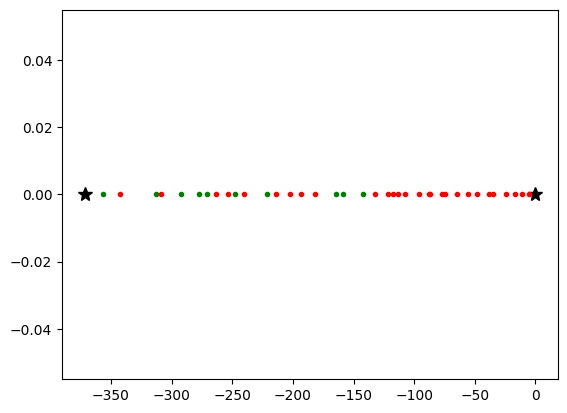

In [176]:
start_data = requests.get(f"https://www.sapsailing.com/sailingserver/api/v1/regattas/{regatta_name.value}/races/{race.value}/startanalysis")
start_data = json.loads(start_data.text)

ww_mark_data = requests.get(f"https://www.sapsailing.com/sailingserver/api/v1/regattas/{regatta_name.value}/races/{race.value}/markpassings")
ww_mark_data = json.loads(ww_mark_data.text)['bywaypoint'][1]['markpassings']

line_lenght = start_data['startline']["lengthInMeters"]

@dataclass
class Competitor:
    name: str
    dist_from_strb: float
    ww_time: int

competitors = []

for c in start_data['competitors']:
    for ww_pos in ww_mark_data:
        if ww_pos['competitor']['name'] == c['competitor']['name']:
            competitors.append(Competitor(name=c['competitor']['name'],
                                  dist_from_strb=c['distanceToStarboardSideOfStartLineInMeters'],
                                  ww_time=ww_pos['timeasmillis']))

competitors.sort(key=lambda x: x.ww_time)

plt.figure()
plt.plot(0,0, 'k*', markersize=10)
plt.plot(-line_lenght,0, 'k*', markersize=10)
for i, c in enumerate(competitors):
    if i < 10:
        plt.plot(-c.dist_from_strb, 0, 'g.')
    else:
        plt.plot(-c.dist_from_strb, 0, 'r.')
plt.show()